# 12-1. 학습 목표 및 목차
---
### 학습 목표

파이썬 라이브러리<mark>(Pandas, Matplotlib, Seaborn)</mark>을 이용해서 여러 가지 그래프를 그리는 법을 학습합니다.
실전 데이터셋으로 직접 시각화 해보며 데이터 분석에 필요한 <mark>탐색적 데이터 분석(EDA)</mark>을 하고 인사이트를 도출해 봅니다.

### 목차

1. 파이썬으로 그래프를 그린다는건?
2. 간단한 그래프 그리기
3. 그래프 4대 천왕: 막대그래프, 선그래프, 산점도, 히스토그램
4. 시계열 데이터 시각화하기
5. Heatmap

# 12-2. 파이썬으로 그래프를 그린다는건?
---

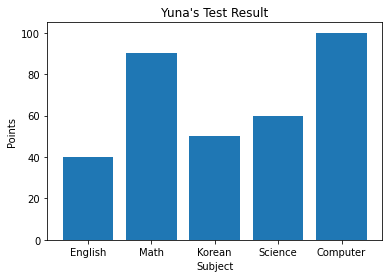

In [3]:
import matplotlib.pyplot as plt       # 
%matplotlib inline

#그래프 데이터 
subject = ['English', 'Math', 'Korean', 'Science', 'Computer']
points = [40, 90, 50, 60, 100]

# 축 그리기
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)

# 그래프 그리기
ax1.bar(subject, points)

# 라벨, 타이틀 달기
plt.xlabel('Subject')
plt.ylabel('Points')
plt.title("Yuna's Test Result")

# 보여주기
plt.savefig('./barplot.png')  # 그래프를 이미지로 출력
plt.show()                    # 그래프를 화면으로 출력

# 12-3. 간단한 그래프 그리기 (1) 막대그래프 그려보기
---

1. **첫번째, 데이터 정의(define the data)**

%matplotlib inline은 IPython에서 사용하는 <mark>매직 메소드</mark>에요.    
<mark>Rich output</mark>에 대한 표현 방식인데요, 그래프와 같은 그림, 소리, 애니메이션 과같은 결과물을 Rich output 이라고 해요.     
IPython과 비슷한 환경인 Jupyter Notebook에서 이 명령어를 입력하면 그래프가 바로 출력됩니다.

In [1]:
# import module and define the data for a drawing graph
import matplotlib.pyplot as plt
%matplotlib inline

#그래프 데이터 
subject = ['English', 'Math', 'Korean', 'Science', 'Computer']
points = [40, 90, 50, 60, 100]

2. **축 그리기(drawing an axis)**

the order of drawing a graph is to first create a <mark>figure object</mark> and add a <mark>subplot</mark> to it.     
It is the process of drawing an axis on drawing paper.

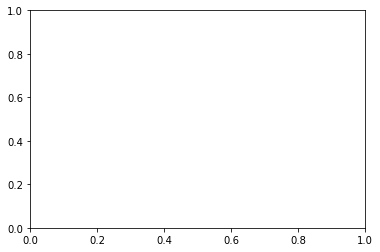

In [3]:
# 축 그리기
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)

만약 fig = plt.figure()만 입력하면

In [5]:
fig = plt.figure()

<Figure size 432x288 with 0 Axes>

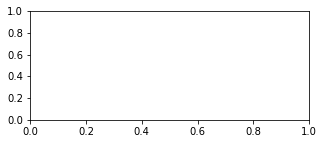

In [16]:
fig = plt.figure(figsize=(5,2))    # figsize=(x,y)
ax1 = fig.add_subplot(1,1,1)       # if I increase the values here, graph gets smaller... why?

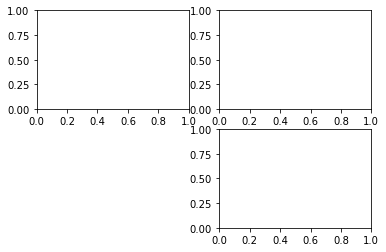

In [22]:
# subplot(size of 1/x, size of 1/y, position of the graph)

fig = plt.figure()
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,4)

3. **그래프 그리기(drawing the graph)**

<BarContainer object of 5 artists>

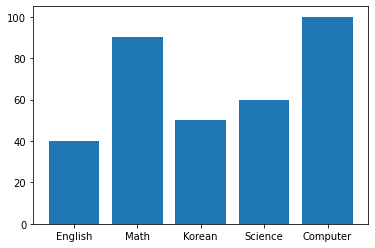

In [24]:
#그래프 데이터 
subject = ['English', 'Math', 'Korean', 'Science', 'Computer']
points = [40, 90, 50, 60, 100]

# 축 그리기
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)

# 그래프 그리기
ax1.bar(subject,points)

4. **그래프 요소 추가하기(Adding graph elements)**

**label, title**
- x라벨 = <mark>xlabel()</mark> 메소드 
    * plt.xlabel('Subject')
- y라벨 = <mark>ylabel()</mark> 메소드 
    * plt.ylabel('Points') 
- title 라벨 = <mark>title()</mark> 메소드
    * plt.title("Yuna's Test Result") 

Text(0.5, 1.0, 'The Test Result')

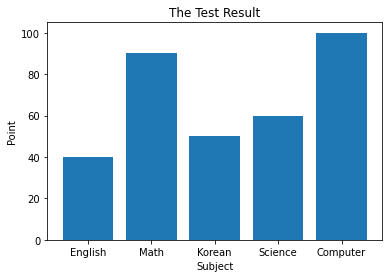

In [27]:
#그래프 데이터 
subject = ['English', 'Math', 'Korean', 'Science', 'Computer']
points = [40, 90, 50, 60, 100]

# 축 그리기
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)

# 그래프 그리기
ax1.bar(subject, points)

# 라벨, 타이틀 달기
plt.xlabel('Subject')
plt.ylabel('Point')
plt.title("The Test Result")

# 12-4. 간단한 그래프 그리기 (2) 선 그래프 그려보기
---
1. **데이터 정의(define the data)**

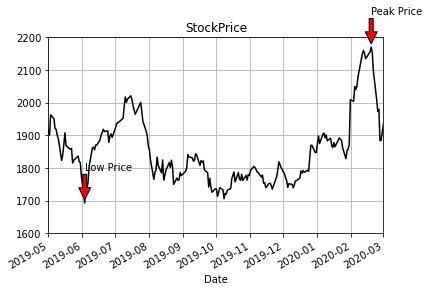

In [29]:
from datetime import datetime
import pandas as pd
import os

# Graph Data
csv_path = os.getenv("HOME") + "/aiffel/data_represent/data/AMZN.csv"
data = pd.read_csv(csv_path ,index_col=0, parse_dates=True)
price = data['Close']

# Drawing the axis & setting coordinate axis
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
price.plot(ax=ax, style='black')
plt.ylim([1600,2200])
plt.xlim(['2019-05-01','2020-03-01'])

# Annotation
important_data = [(datetime(2019, 6, 3), "Low Price"),(datetime(2020, 2, 19), "Peak Price")]
for d, label in important_data:
    ax.annotate(label, xy=(d, price.asof(d)+10), 
                xytext=(d,price.asof(d)+100),
                arrowprops=dict(facecolor='red'))

# Grid & Title
plt.grid()
ax.set_title('StockPrice')

# Show
plt.show()

**<u><h2>Pandas Series 데이터 활용</h2>**    
Pandas의 Series는 선 그래프를 그리기에 최적의 자료구조를 갖추고 있습니다.    
위 예시코드에서는 <mark>price = data['Close']</mark>가 바로 Pandas의 Series입니다.    
다음 스텝에서 좀더 설명하겠지만, Pandas도 자체적인 선 그래프 그리기 기능을 제공합니다.    

위 예시코드에서는 <mark>price.plot(ax=ax, style='black')</mark>에서 Pandas의 plot을 사용하면서, matplotlib에서 정의한 subplot 공간 ax를 사용한 것을 볼 수 있습니다.

**좌표축 설정**
<mark>plt.xlim()</mark>, <mark>plt.ylim()</mark>을 통해 <mark>x, y 좌표축</mark>의 적당한 범위를 설정해 줄 수 있습니다.

**주석**  
그래프 안에 추가적으로 글자나 화살표 등 주석을 그릴 때는 <mark>annotate() 메소드</mark>를 이용합니다.
주석달기는 그래프 그리기의 고급 기법입니다. 복잡하지만 위 예시코드를 잘 살펴봐 주세요.

**그리드**
<mark>grid() 메소드</mark>를 이용하면 <mark>grid(격자눈금)</mark>를 추가할 수 있어요.

# 12-5. 간단한 그래프 그리기 (3) plot 사용법 상세
---

#### plt.plot()로 그래프 그리기
위에서 <mark>figure()</mark>객체를 생성하고 <mark>add_subplot()</mark>으로 서브 플롯을 생성하며 **plot**을 그린다고 했습니다.
> **pyplot** is a collection of functions that make matplotlib work like MATLAB.

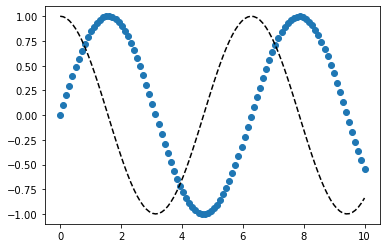

In [31]:
import numpy as np
x = np.linspace(0, 10, 100) 
plt.plot(x, np.sin(x),'o')
plt.plot(x, np.cos(x),'--', color='black') 
plt.show()

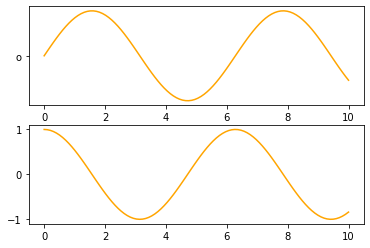

In [32]:
x = np.linspace(0, 10, 100) 

plt.subplot(2,1,1)
plt.plot(x, np.sin(x),'orange','o')

plt.subplot(2,1,2)
plt.plot(x, np.cos(x), 'orange') 
plt.show()

# linestyle, marker옵션
---
라인 스타일은 plot()의 인자로 들어가는데, 아래와 같이 다양한 방법으로 표기할 수 있습니다.

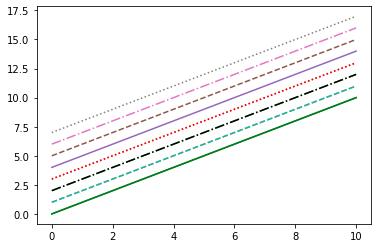

In [33]:
x = np.linspace(0, 10, 100) 

plt.plot(x, x + 0, linestyle='solid') 
plt.plot(x, x + 1, linestyle='dashed') 
plt.plot(x, x + 2, linestyle='dashdot') 
plt.plot(x, x + 3, linestyle='dotted')
plt.plot(x, x + 0, '-g') # solid green 
plt.plot(x, x + 1, '--c') # dashed cyan 
plt.plot(x, x + 2, '-.k') # dashdot black 
plt.plot(x, x + 3, ':r'); # dotted red
plt.plot(x, x + 4, linestyle='-') # solid 
plt.plot(x, x + 5, linestyle='--') # dashed 
plt.plot(x, x + 6, linestyle='-.') # dashdot 
plt.plot(x, x + 7, linestyle=':'); # dotted

### Pandas로 그래프 그리기
###### Pandas도 plot()메소드를 통해 여러 가지 그래프를 그릴 수 있습니다.

matplotlib과 연계해 사용하면 좋은데요, 아래 메소드는 각 메소드의 기능을 정리하였습니다:

   <h6><u>pandas.plot메서드 인자</h6>
    
- label: 그래프의 introductory name
- ax: 그래프를 그릴 matplotlib의 서브플롯 객체.
- style: matplotlib에 전달할 'ko--'같은 스타일의 문자열
- alpha: 투명도 (0 ~1)
- kind: 그래프의 종류: line, bar, barh, kde
- logy: Y축에 대한 로그스케일
- use_index: 객체의 색인을 눈금 이름으로 사용할지의 여부
- rot: 눈금 이름을 로테이션(0 ~ 360)
- xticks, yticks: x축, y축으로 사용할 값
- xlim, ylim: x축, y축 한계
- grid: 축의 그리드 표시할 지 여부    

<h6><u>pandas의 data가 DataFrame일때 plot 메서드 인자</h6>
    
- subplots: 각 DataFrame의 칼럼을 독립된 서브플롯에 그린다.
- sharex: subplots=True면 같은 X축을 공유하고 눈금과 한계를 연결한다.
- sharey: subplots=True면 같은 Y축을 공유한다.
- figsize: 그래프의 크기, 튜플로 지정
- title: 그래프의 제목을 문자열로 지정
- sort_columns: 칼럼을 알파벳 순서로 그린다.

<AxesSubplot:>

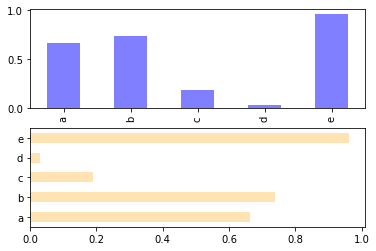

In [49]:
fig, axes = plt.subplots(2, 1)
data = pd.Series(np.random.rand(5), index=list('abcde'))
data.plot(kind='bar', ax=axes[0], color='#0000ff', alpha=0.5)
data.plot(kind='barh', ax=axes[1], color='orange', alpha=0.3)

<AxesSubplot:>

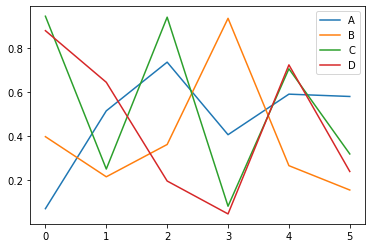

In [50]:
df = pd.DataFrame(np.random.rand(6,4), columns=pd.Index(['A','B','C','D']))
df.plot(kind='line')

# 12-6. 간단한 그래프 그리기 (4) 정리해 보자
---
### 정리

###### 그래프를 그리는 과정을 다시 정리해 봅시다.

1. fig = plt.figure(): figure 객체를 선언해 '도화지를 펼쳐' 줍니다.
2. ax1 = fig.add_subplot(1,1,1) : 축을 그립니다.
3. ax1.bar(x, y) 축안에 어떤 그래프를 그릴지 메소드를 선택한 다음, 인자로 데이터를 넣어줍니다.
4. 그래프 타이틀 축의 레이블 등을 plt의 여러 메소드 grid, xlabel, ylabel 을 이용해서 추가해주고
5. plt.savefig 메소드를 이용해 저장해 줍니다.

파이썬 기반의 시각화 라이브러리인 Pandas, Matplotlib, Seaborn 모두 이런 식으로 그래프를 그립니다.

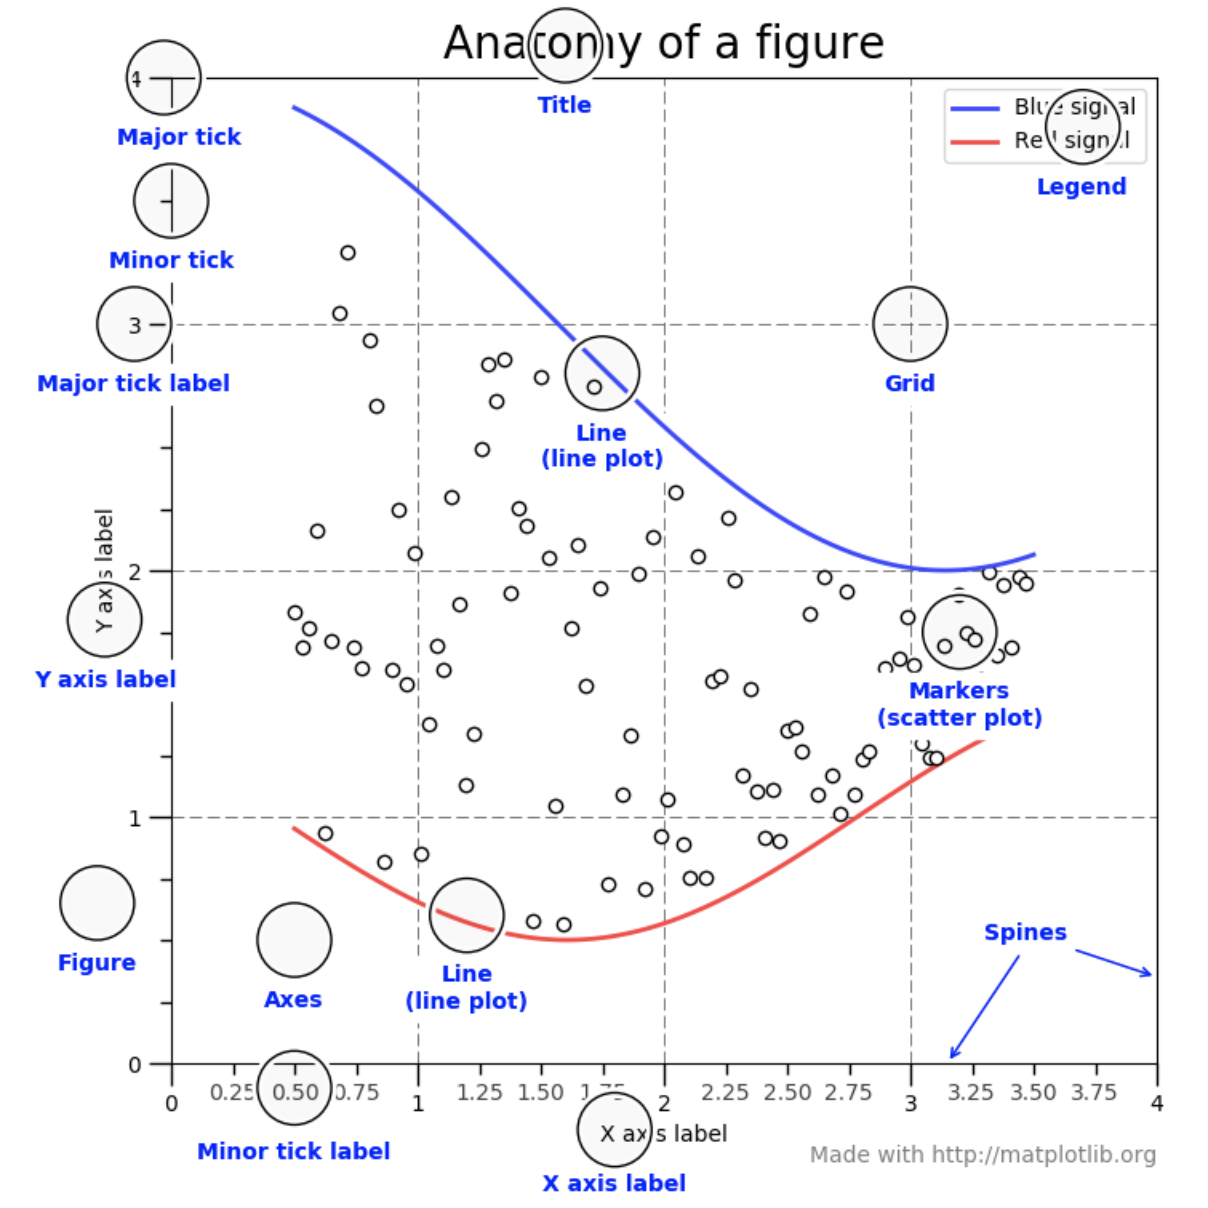

# 12-7. 그래프 4대 천왕 (1) 데이터 준비
---
앞에서 그래프 그리는 방법에 대한 큰 틀을 배웠습니다. 이제 자주 사용되는 그래프를 그려보며 연습해 봅시다.